# Applied Machine Learning - Part 1: Introduction
## A simple classification task
### Import required modules and load data file

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
fruits = pd.read_csv('fruit_data_with_colours.csv')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [26]:
# color score is spectrum scale
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [27]:
fruits['fruit_name'].value_counts().to_frame()

,count
fruit_name,
apple,19
orange,19
lemon,16
mandarin,5


### Create train-test split

In [28]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Visulization
#### Feature pair plot

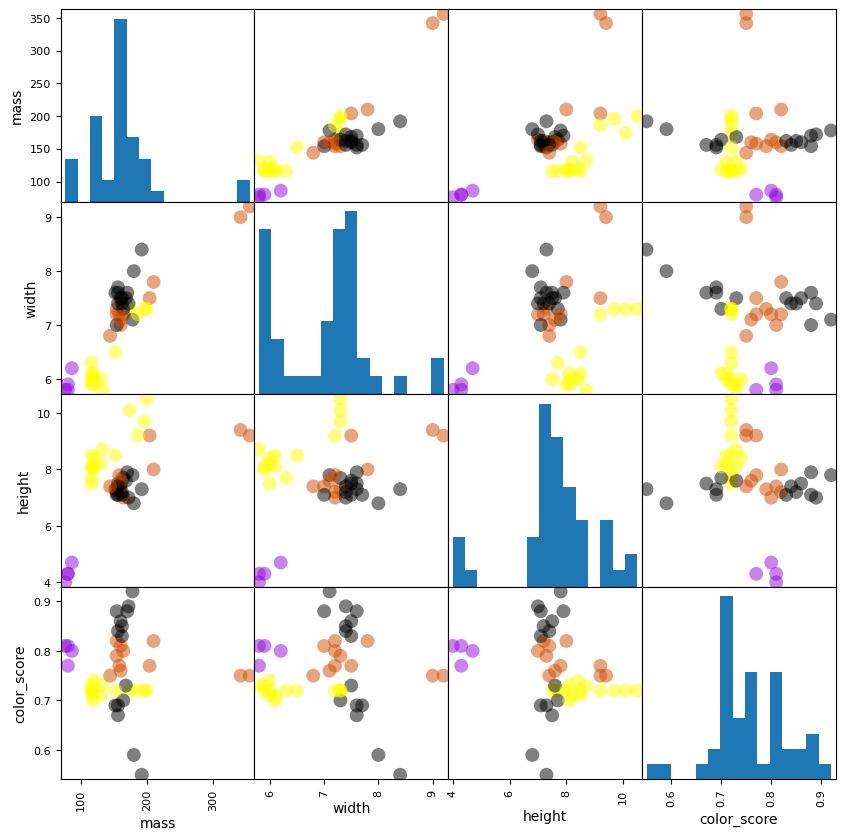

In [29]:
# Before apply machine learning, we need to check our data and make some visualization to see their correlations and so on.
from matplotlib import colormaps
cmap = colormaps.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=100, hist_kwds={'bins':15}, figsize=(10,10), cmap=cmap)

In [30]:
# it shows the distribution of each uniques in their ranges, and all fruits location in each feature pair. This plot showing
# that some pairs are better for dividing fruites.

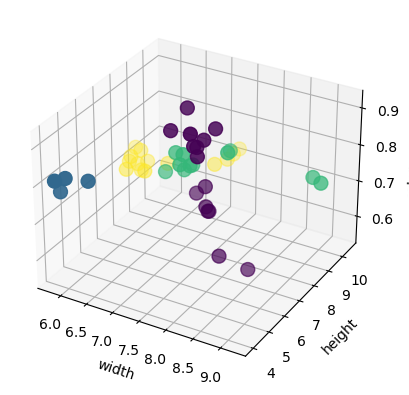

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create classifier object

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

### Fit the estimator

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier

In [35]:
knn.score(X_test, y_test)

0.5333333333333333

In [43]:
fruit_prediction = knn.predict([[176, 7.4, 7.2, 0.6]])
fruit_prediction

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### How sensitive is K-NN classification accuracy to the choice of the 'k' parameter?

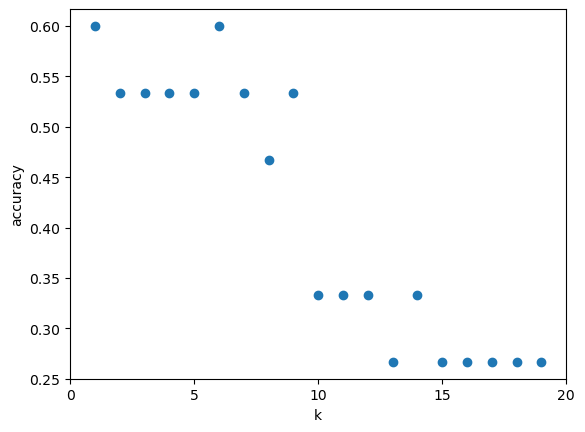

In [46]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()